### Data 620 - Week 3: Assignment 2
### Bikram Barua and Leticia Salazar
### February 12, 2023

#### Overview:

This week's assignment is to:

1. Load a graph database of your choosing from a text file or other source. If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. 
3. Use NetworkX to visualize the data
4. Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.

#### Data source:

The dataset is a subset of authentication/authorization system for a web based business application. The dataset contains list of usernames with their corresponding employee Ids. The employees('Users') use the usernames as their login id as a part of the authentication process.

The web application has multiple modules, whose access is controlled using the 'Groups'. The dataset contains the list of groups and a seperate mapping of the usernames with the group names which they are granted access as a function of the authorization process for the web application access control. 

##### Load libraries:

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

##### Load the data:
Data exploration of the data is performed below to view the size of the datasets we will be working with.

In [2]:
users = "https://raw.githubusercontent.com/letisalba/Data-620/master/Week-3/users.csv"
df_users = pd.read_csv(users)
print(df_users.head(5))

   username  userid
0     aauto     295
1       abc     277
2  acommins     583
3  advauto1     296
4    alexey     580


In [3]:
df_users.shape

(386, 2)

In [4]:
groups = "https://raw.githubusercontent.com/letisalba/Data-620/master/Week-3/groups.csv"
df_groups = pd.read_csv(groups)
print(df_groups.head(5))

   id           group_name
0   1                ADMIN
1   2                 USER
2  15   Vehicle Visibility
3  16       DFY Operations
4  17  Document management


In [5]:
df_groups.shape

(26, 2)

In [6]:
group_members = "https://raw.githubusercontent.com/letisalba/Data-620/master/Week-3/group_members.csv"
df_grp_mem = pd.read_csv(group_members)
print(df_grp_mem.head(5))

     id  username  group_id  tenant_id
0  1810    smalla        38          1
1  1807    bikram        38          1
2  1809  gmspcmov        38          1
3  1811  monlucha        38          1
4  1816  krskucyk        38          1


In [7]:
df_grp_mem.shape

(1000, 4)

##### Graph analysis:

In [8]:
#from py2neo import Graph,Node,Relationship

In [9]:
#graph = Graph("http://localhost:7474", auth=("neo4j", "Data620/3"))

In [10]:
#pip install graphdatascience

In [11]:
from graphdatascience import GraphDataScience

host = "bolt://localhost:7687"
user = "neo4j"
password= "Data620/3"

gds = GraphDataScience(host, auth=(user, password))

In [16]:
gds.set_database("neo4j")

In [17]:
print(gds.version())

2.3.0


##### Visualization of the data

In [19]:
query = """
LOAD CSV WITH HEADERS FROM $url AS line
MATCH (user: User {username: line.username})  
MATCH (group: Group{ id: line.group_id})  
CREATE (user)-[:HAS_ACCESS]->(group) 
"""
params = {'url': 'https://raw.githubusercontent.com/letisalba/Data-620/master/Week-3/group_members.csv'}
gds.run_cypher(query, params)

""


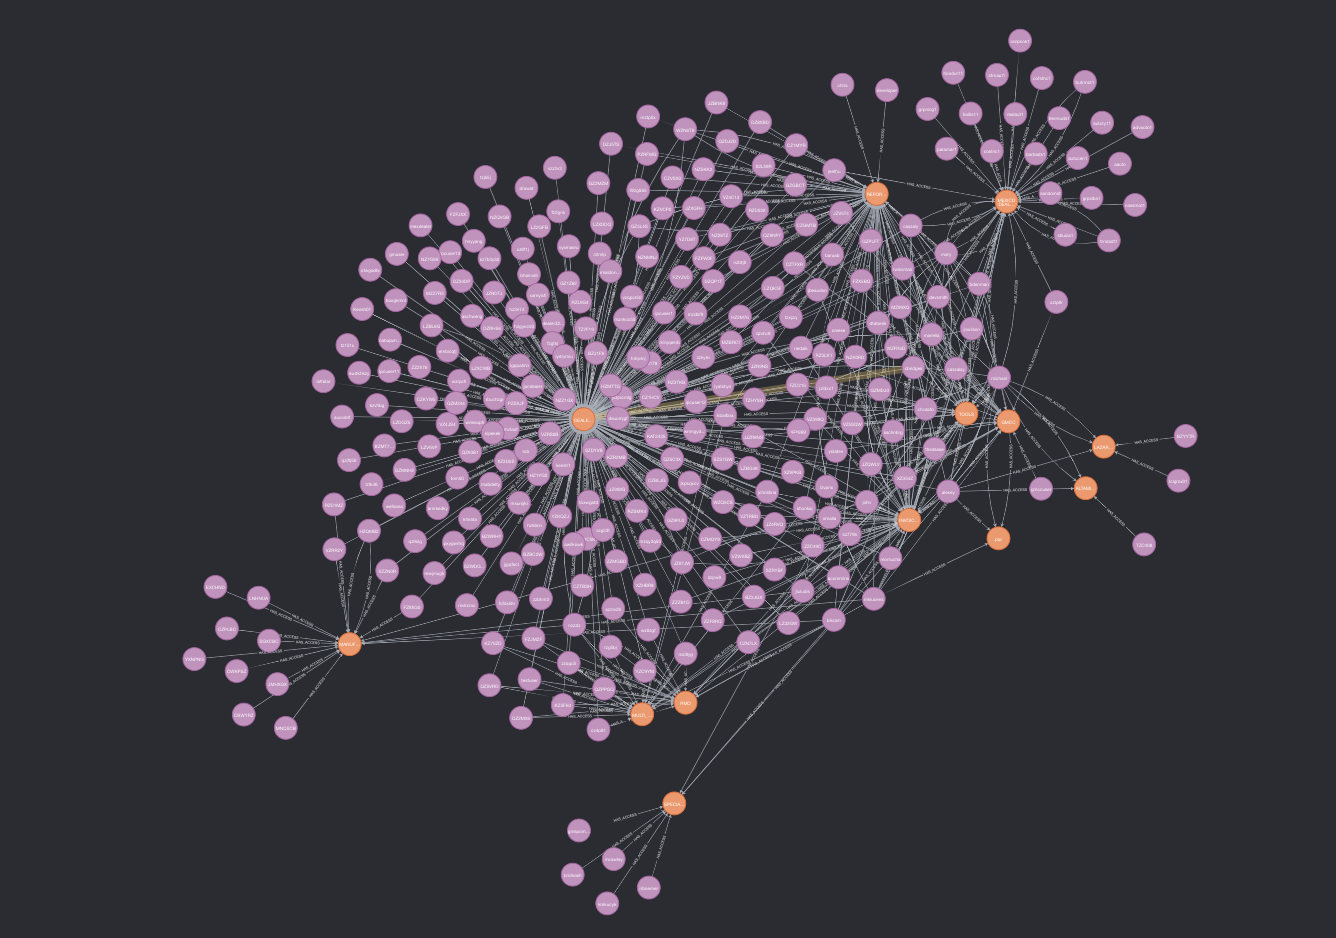

In [24]:
from IPython import display
display.Image("https://raw.githubusercontent.com/letisalba/Data-620/master/Week-3/pictures/Node_graph.png")